# Simple Linear Regression - Supervised Model

## Import Library

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8) # Set default figure size

In [6]:
# !pip install --upgrade seaborn
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade matplotlib==3.7.1
print("seaborn version", sns.__version__)
print("matlpotlib version", matplotlib.__version__)

seaborn version 0.12.2
matlpotlib version 3.7.1


## Read Dataset

In [11]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [13]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


independent variable = feature = estimator = attribute = input = explanatory variable

dependent variable = target  = label = output = response variable

rows = observation, sample

**features** = {TV, radio, newspaper}

**target** = sales

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe() 
# Pay attention to the mean/std/min/50%/max values of numeric features.
# Can help realise underlying distribution/outlier situation

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# decriptive statistics in case of 1 outlier
print("mean :", np.mean([100, 110, 120, 400]))
print("std  :", np.std([100, 110, 120, 400]))  # 182.5


mean : 182.5
std  : 125.77261228105267


In [7]:
# decriptive statistics in case of a larger outlier
# notice std got closer to the mean
print("mean :", np.mean([100, 110, 120, 700]))
print("std  :", np.std([100, 110, 120, 700]))

mean : 257.5
std  : 255.57533136044253


In [8]:
print("mean :", np.mean([100, 110, 120, 125, 130, 140, 150, 160, 166, 167, 170]))
print("std  :", np.std([100, 110, 120, 125, 130, 140, 150, 160, 166, 167, 170]))

mean : 139.8181818181818
std  : 23.41257696902625


In [9]:
# decriptive statistics in case of even a larger outlier
# std got larger than the mean
print("mean :", np.mean([100, 110, 120, 900]))
print("std  :", np.std([100, 110, 120, 900]))

mean : 307.5
std  : 342.153109002388


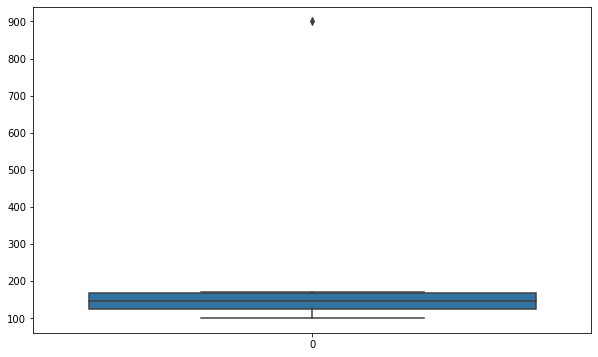

In [46]:
test_df = pd.DataFrame(data = [100, 110, 120, 125, 130, 140, 150, 160, 166, 167, 170, 900], columns=["Feature1"])

plt.figure(figsize=(10,6))
sns.boxplot(test_df.Feature1);

<Axes: xlabel='TV', ylabel='Count'>

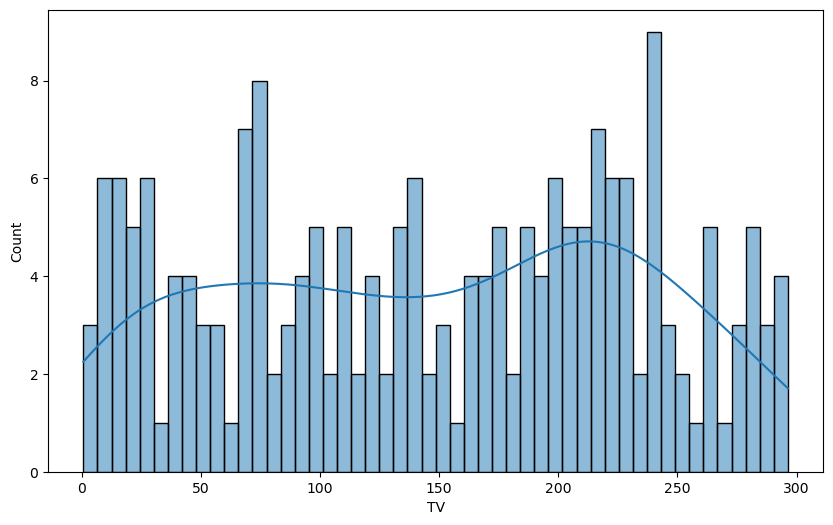

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df.TV, bins=50, kde=True)

# The histogram of a numerical feature can be checked to see
# the distribution of the variable. Doesn't necessarily impact the model performance
# if the variable is not normally distributed, however, can help understand the variable.

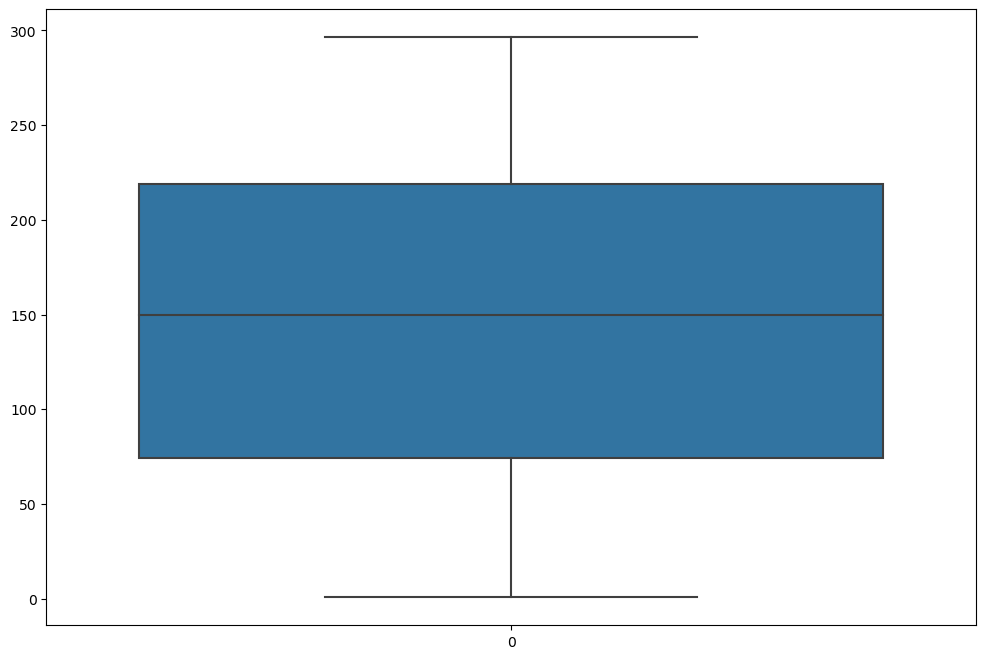

In [16]:
#plt.figure(figsize=(10,8))
sns.boxplot(df.TV);

# boxplot also tells us about the 25%/median/75% of the variable as well as
# any potential outliers (data points that end up outside of the whiskers)

# In ML, in contrast to statistics, outliers do not mean something is problematic unless there was a systematic failure in data gathering process.
# The only thing we care about is if there are under-represented observation points.

## Create new independent variable (feature)

In [19]:
df["total_spend"] = df["radio"] + df["newspaper"]
# Feature engineering also includes methods of deriving new variables from the ones we already have

In [18]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [20]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()

# Reorder the columns so that our target column (sales) is at the end. Eventually becomes a second nature to look for the target variable.

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,107.0,22.1
1,44.5,39.3,45.1,84.4,10.4
2,17.2,45.9,69.3,115.2,9.3
3,151.5,41.3,58.5,99.8,18.5
4,180.8,10.8,58.4,69.2,12.9


## Which feature is more suitable for linear regression?

In [21]:
df["sales"].corr(df["TV"])

# We assume that there's a linear relationship between the independent and dependent variable(s). So long as this assumption holds true,
# the data is more or less suitable for linear regression.

0.7822244248616061

In [22]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 60, 65, 70, 75, 80]}

df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,60
2,32,65
3,33,70
4,34,75
5,35,80


In [23]:
df2.temperature.corr(df2.ice_cream_sale)

# Correlation tells us how features correlate. Doesn't necessarily formulate the impact amount of an increase/decrease of a variable on the other. 

# Regression helps as answer this question: How much of a change will I see if I change temperature variable by one unit.

0.989743318610787

In [24]:
my_dict = {"temperature": [30, 31, 32, 33, 34, 35],
           "ice_cream_sale": [50, 51, 53, 54, 55, 56]}
df2 = pd.DataFrame(my_dict)
df2

,temperature,ice_cream_sale
0,30,50
1,31,51
2,32,53
3,33,54
4,34,55
5,35,56


In [25]:
df2.temperature.corr(df2.ice_cream_sale)

# In the first df, regression coefficient is 1, and corr is 0.9821.
# In the second df, regression coefficient is 5, and corr is 0.9921.
# This proves that correlation doesn't tell us how much a unit of change in one variable changes the other whereas regression does.

0.9921609337929049

In [21]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")
    
# Check which features have high correlation with the target. Features with high correlations are more useful
# to use in linear regression.

corr between sales and TV          :  0.7822244248616064
corr between sales and radio       :  0.5762225745710553
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017422


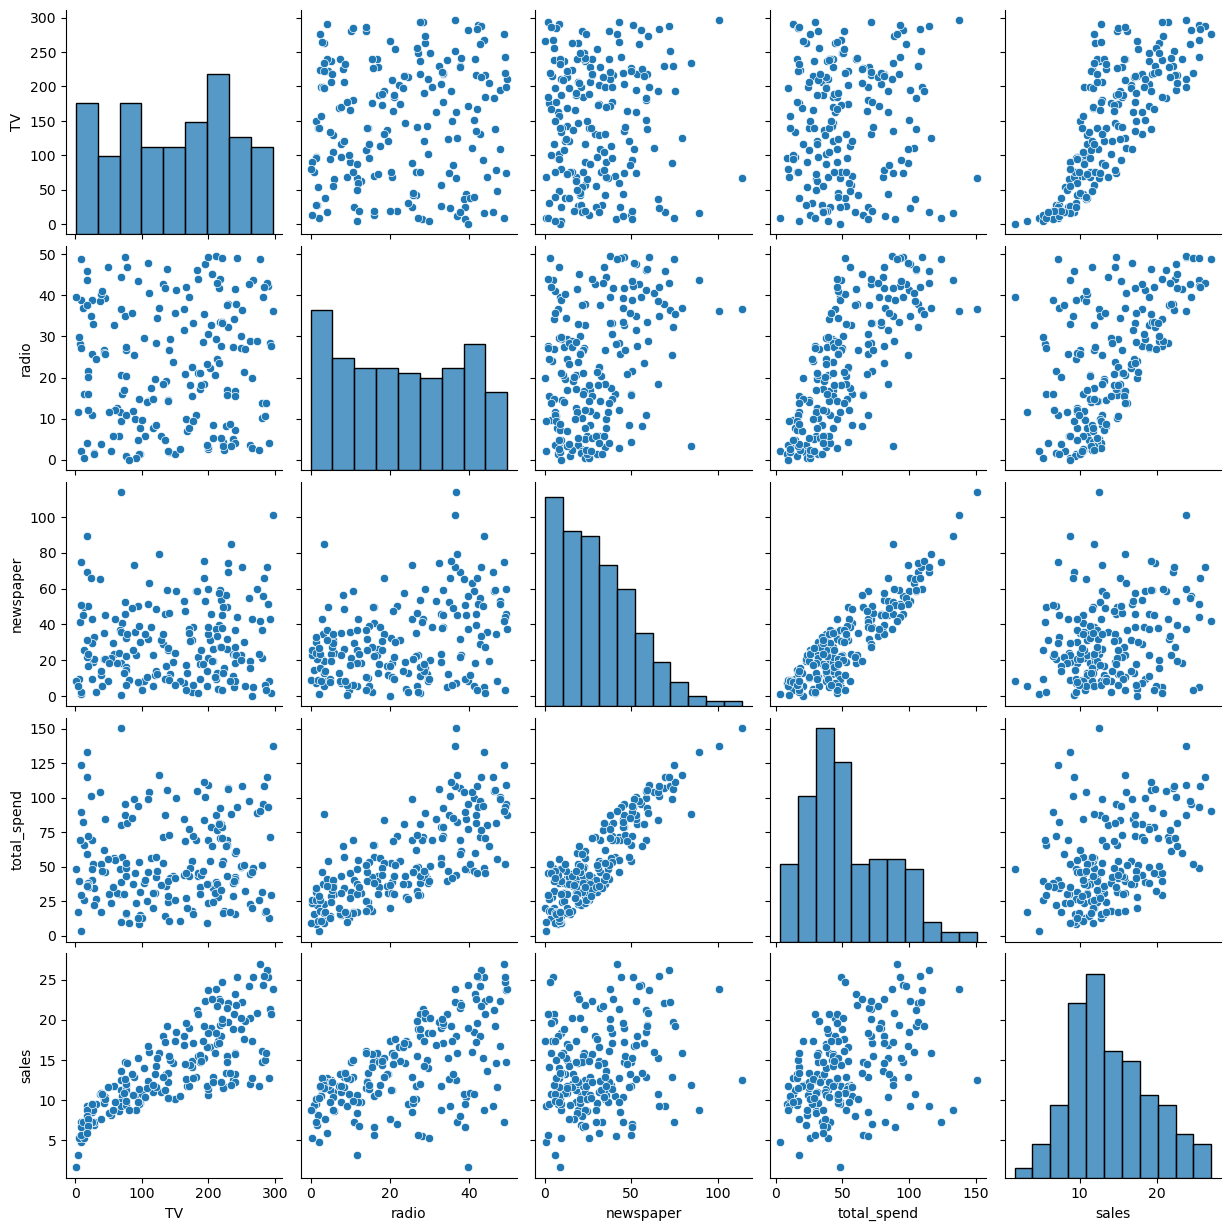

In [30]:
# sns.pairplot(df)
sns.pairplot(df)
# Pairplot also helps us visualise potential correlations between all features.

In [31]:
# df.corr()
df.corr()

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.067366,0.782224
radio,0.054809,1.000000,0.354104,0.742235,0.576223
newspaper,0.056648,0.354104,1.000000,0.889547,0.228299
total_spend,0.067366,0.742235,0.889547,1.000000,0.445074
sales,0.782224,0.576223,0.228299,0.445074,1.000000


<Axes: >

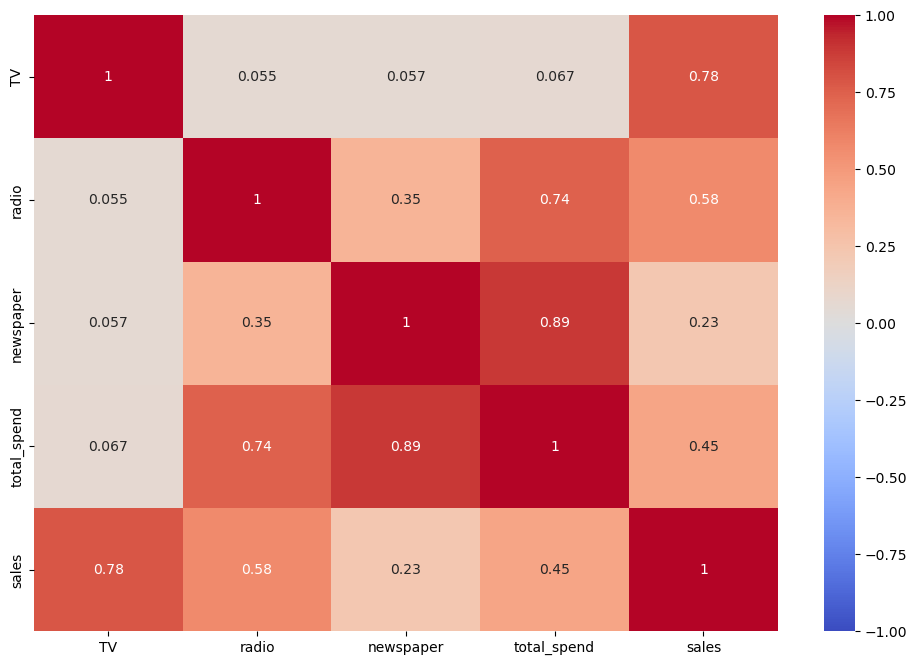

In [41]:
# sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [42]:
# df = df[["total_spend", "sales"]]
# df

df = df[['total_spend', 'sales']]
df
# As the feature `total_spend` has the highest correlation with our target and is a combination of all the other independent features, we 
# will go ahead and use it as the only predictor.

,total_spend,sales
0,107.0,22.1
1,84.4,10.4
2,115.2,9.3
3,99.8,18.5
4,69.2,12.9
...,...,...
195,17.5,7.6
196,13.0,9.7
197,15.7,12.8
198,108.2,25.5


## Plotting the relationship between independent variable and dependent variable 

<Axes: xlabel='total_spend', ylabel='sales'>

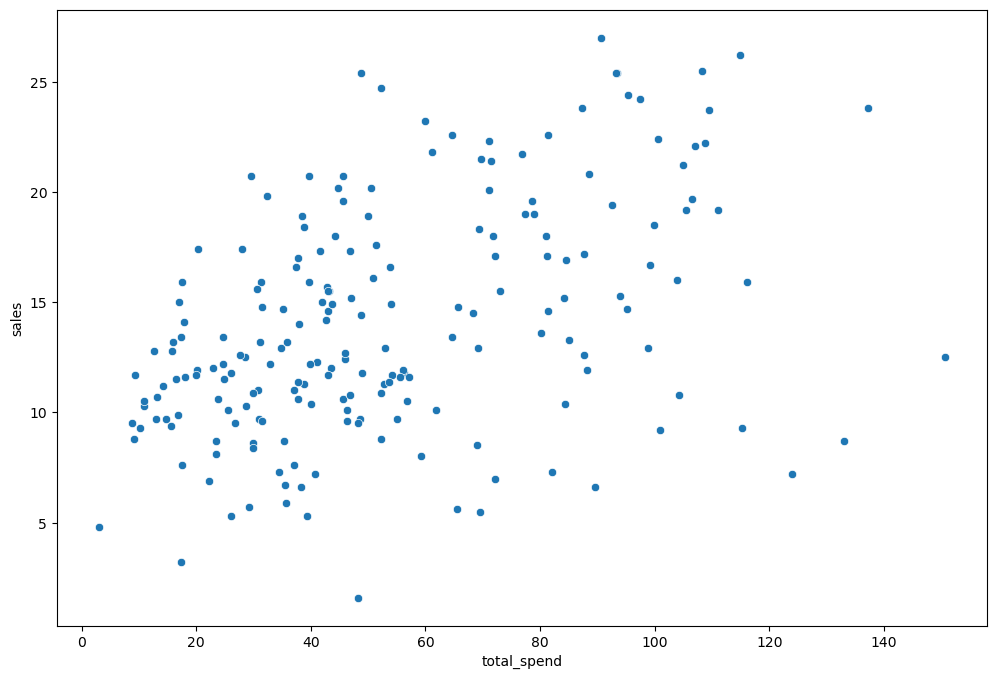

In [43]:
# sns.scatterplot(x="total_spend", y="sales", data=df)

sns.scatterplot(x='total_spend', y='sales', data=df)
# Can also visualise the correlation with scatterplot.

## Correlation between independent variable and dependent variable

In [47]:
# corr = df["sales"].corr(df["total_spend"])
# corr

corr = df['sales'].corr(df['total_spend'])
corr

0.44507409354532323

In [48]:
# df["total_spend"].corr(df["sales"])


df['total_spend'].corr(df['sales'])
# Correlation is completely symmetrical.

0.4450740935453233

## Coefficient of determination (R2)

In [49]:
# R2_score = corr**2
# R2_score


R2_score = corr ** 2
R2_score
# R2 score tell us how much of the variation in the target column can be explained with the independent features we have at hand.
# Statistically [0, 1]
# Sklearn [-np.inf, 1]

0.19809094874519115

## Linear Regression

<Axes: xlabel='total_spend', ylabel='sales'>

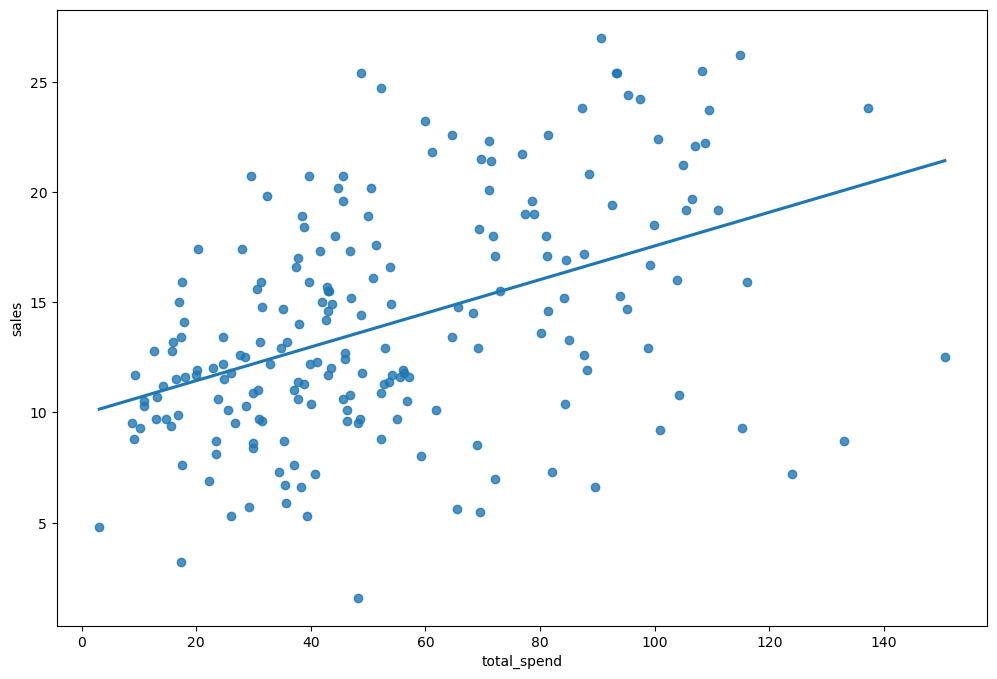

In [52]:
# sns.regplot(x="total_spend", y="sales", data=df, ci=None)

sns.regplot(x='total_spend', y='sales', data=df, ci=None)
# We can use `regplot` from `seaborn` to fit a regression line to this data and visualise it as it's only 2-D.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [31]:
# y_pred = b1X + b0

In [56]:
# X = df["total_spend"]
# y = df["sales"]

X = df['total_spend']
y = df['sales']

## Determination of coefficients (slope and intercept)

In [59]:
# np.polyfit(X, y, deg=1)
np.polyfit(X, y, deg=1)

# We can use the `polyfit` function from numpy to calculate the linear regression coefficients. This
# step is redundant and only for training purposes. There are far more useful methods to do this automatically which we will see in the upcoming lectures.

# polyfit means polynomial fit. A polynomial with a degree of 1 is a linear fit. Keep that in mind.

array([0.07640445, 9.91056555])

In [61]:
# slope, intercept = np.polyfit(X, y, deg=1)
slope, intercept = np.polyfit(X, y, deg=1)
# Slope is the coefficient of our independent feature.
# Intercept is the y value when x=0

In [62]:
# print("slope    :", slope)
# print("intercept:", intercept)

print('slope is :', slope)
print('intercept :', intercept)

slope is : 0.07640444546080784
intercept : 9.910565554190246


## Why do we use the least squares error method to find the regression line that best fits the data?

In [36]:
# y_pred = 0.04868787931904817*X + 4.243028216036326

In [63]:
# b1, b0 = np.polyfit(X, y, deg=1)

b1, b0 = np.polyfit(X, y, deg=1)
# b1 = slope, b0= intercept

In [64]:
print("b1 :", b1)
print("b0 :", b0)

print('b1: ', b1)
print('b0: ', b0)

b1 : 0.07640444546080784
b0 : 9.910565554190246
b1:  0.07640444546080784
b0:  9.910565554190246


In [65]:
X

0      107.0
1       84.4
2      115.2
3       99.8
4       69.2
       ...  
195     17.5
196     13.0
197     15.7
198    108.2
199     17.3
Name: total_spend, Length: 200, dtype: float64

In [66]:
# y_pred = b1*X + b0

y_pred = b1*X + b0

In [67]:
# values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2, "ABS":abs(y-y_pred)}
# df_2 = pd.DataFrame(values)
# df_2

values = {'actual': y, 'predicted': y_pred, 'residual': y-y_pred, 'LSE': (y-y_pred)**2, 'ABS': abs(y-y_pred)}
df_2 = pd.DataFrame(values)
df_2
# LSE = least squared errors
# ABS = absolute errors
# Remember that LSE squares the residuals, hence penalises high errors whereas ABS does not do that.

# Which metric to use will depend on your use case. If you have a lot of outliers in the dataset, LSE can be useful.

,actual,predicted,residual,LSE,ABS
0,22.1,18.085841,4.014159,16.113471,4.014159
1,10.4,16.359101,-5.959101,35.510882,5.959101
2,9.3,18.712358,-9.412358,88.592477,9.412358
3,18.5,17.535729,0.964271,0.929818,0.964271
4,12.9,15.197753,-2.297753,5.279670,2.297753
...,...,...,...,...,...
195,7.6,11.247643,-3.647643,13.305302,3.647643
196,9.7,10.903823,-1.203823,1.449191,1.203823
197,12.8,11.110115,1.689885,2.855710,1.689885
198,25.5,18.177527,7.322473,53.618617,7.322473


In [70]:
# df_2.residual.sum().round()

df_2.residual.sum().round()

# Sum of residuals in linear regression will always be (almost, considering floating point precision) equal to 0.

-0.0

## Prediction with simple linear regression

In [72]:
# potential_spend = np.linspace(0, 500, 100)
# potential_spend

potential_spend = np.linspace(0, 500, 100)
potential_spend

# Create a dummy set of observations to get inference (predictions) on. These data points are linearly spaced between 0 and 500.

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [73]:
# predicted_sales_lin = b1* potential_spend + b0
# predicted_sales_lin

predicted_sales_lin = b1 * potential_spend + b0
predicted_sales_lin

array([ 9.91056555, 10.29644659, 10.68232763, 11.06820867, 11.4540897 ,
       11.83997074, 12.22585178, 12.61173282, 12.99761386, 13.38349489,
       13.76937593, 14.15525697, 14.54113801, 14.92701904, 15.31290008,
       15.69878112, 16.08466216, 16.47054319, 16.85642423, 17.24230527,
       17.62818631, 18.01406735, 18.39994838, 18.78582942, 19.17171046,
       19.5575915 , 19.94347253, 20.32935357, 20.71523461, 21.10111565,
       21.48699668, 21.87287772, 22.25875876, 22.6446398 , 23.03052084,
       23.41640187, 23.80228291, 24.18816395, 24.57404499, 24.95992602,
       25.34580706, 25.7316881 , 26.11756914, 26.50345017, 26.88933121,
       27.27521225, 27.66109329, 28.04697433, 28.43285536, 28.8187364 ,
       29.20461744, 29.59049848, 29.97637951, 30.36226055, 30.74814159,
       31.13402263, 31.51990366, 31.9057847 , 32.29166574, 32.67754678,
       33.06342782, 33.44930885, 33.83518989, 34.22107093, 34.60695197,
       34.992833  , 35.37871404, 35.76459508, 36.15047612, 36.53